In [408]:
from google.colab import drive # remove the cell if not using colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [409]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.dummy import DummyClassifier
base_path = Path('/content/drive/Shareddrives/KN Solvro/03. Projekty/Wakacyjne Wyzwanie 2025/ML/notebooki/1_Przetwarzanie i wizualizacja danych') # change path here!

# Klasyfikacja pasażerów Titanica
Po wysłaniu raportu pozostało już tylko czekać. Dni mijały, ale w końcu telefon zadzwonił. Okazało się, że po konsultacji Twojego raportu z najbardziej doświadczonymi specjalistami w dziedzinie, zleceniodawca zdecydował się powierzyć Ci dalszą część tajemniczego zadania. Chodzi oczywiście o... **stworzenie modelu przewidującego szanse przeżycia katastrofy Titanica**.

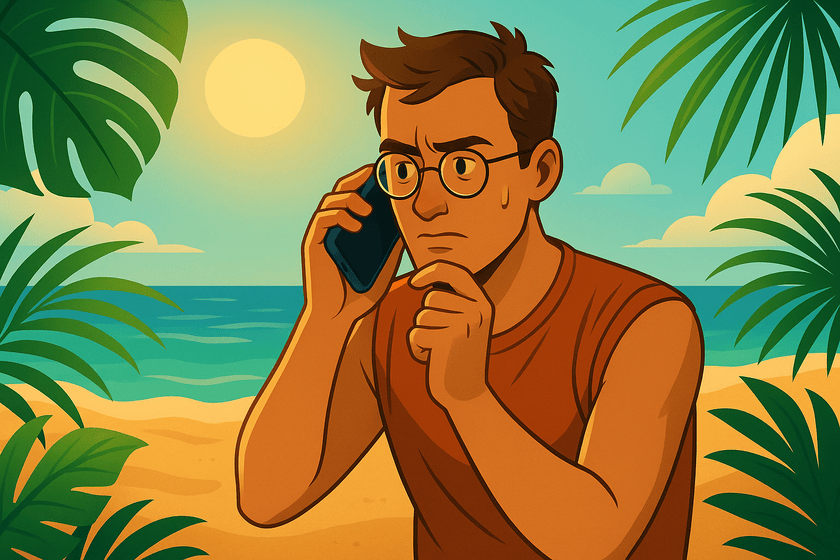

(*AI-generated image*)


#### Twoim celem będzie jest wytrenowanie modeli do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

Poniżej znajdziesz pytania, które mogą być pomocne w zadaniu:

- Czego nauczyło Cię o badanym zbiorze danych poprzednie zadanie? Jak możesz wykorzystać wyciągnięte z niego wnioski w procesie tworzenia modelu?
- Jak przeprowadzenie standaryzacji danych może wpływać na zachowanie modelu?
- Co mój model robi i w jaki sposób?
- Jak nie przetrenować wybranego modelu?
- Jaki wynik klasyfikacji możemy uznać za *dobry*?


Wymagania:
- Wypisz obserwacje z pierwszego zadania, które pomogą Ci w tym. Co było przydatne, a co okazało się bezużyteczne?
- [Nie doprowadź](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do ~~przecieku statku~~ wycieku danych (np. nie ucz modelu na danych testowych). Nauczone modele odpal na danych treningowych i testowych - opisz uzyskane wyniki.
- Stwórz baseline, czyli dla porównania sprawdź jak z zadaniem radzi sobie [Dummy Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) (jeśli Twój docelowy model radzi sobie gorzej - uciekaj)
- Przeprowadź badania na dwóch wybranych modelach uczenia maszynowego (np. spośród: drzew decyzyjnych, SVM, MLP, KNN, z gwiazdką [XGBoost](https://xgboost.readthedocs.io/en/stable))
- W badaniach użyj wybranych metryk. Wybór uzasadnij.
- Dla każdego modelu wybierz co najmniej dwa hiperparametry i przeprowadź badania zależności wyników metryk od wartości hiperparametrów. Zwizualizuj wszystko ładnie, zastanów się dlaczego tak mogło być i wyciągnij i wypisz wnioski.
- Podsumuj przeprowadzone badania, wypisz wnioski.

Niezmiennie, zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Jeśli chcesz, możesz sprawdzić (przyjmując pewne założenia), jakie byłyby Twoje szanse na Titanicu.

Uwaga! Jeśli Titanic to dla Ciebie nic i baaaaardzo chcesz to możesz w ramach tego zadania zająć się [bardziej wymagającym](https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data) zbiorem.

In [410]:
titanic_df = pd.read_csv('/content/drive/MyDrive/titanic.csv', index_col='PassengerId')

<Axes: xlabel='Para płeć plus czy osoba przezyla', ylabel='ilosc osob'>

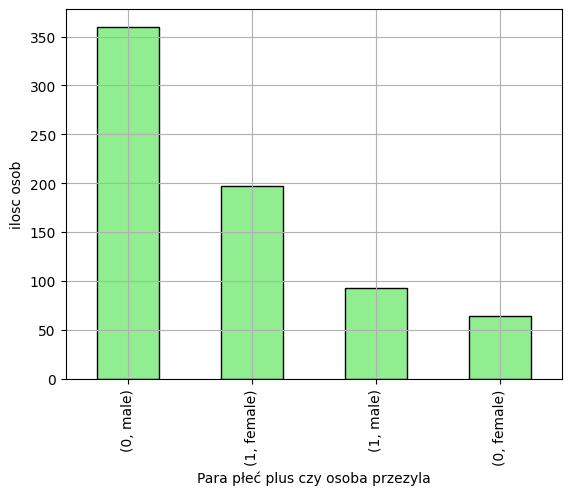

In [411]:
titanic_df['Cabin'].str[0].unique()
titanic1 = titanic_df["Survived"].value_counts()

titanic_imp_col = titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']]

titanic_alive = titanic_imp_col.loc[titanic_df['Survived'] == 1]
titanic_died = titanic_imp_col.loc[titanic_df['Survived'] == 0]
titanic_imp_col = titanic_imp_col.iloc[:, 0:7]
titanic_imp_col.dropna(subset=['Age'], inplace=True)
titanic_imp_col[['Survived', 'Sex']].value_counts().plot(kind='bar', color='lightgreen' , edgecolor='black', grid=True, xlabel='Para płeć plus czy osoba przezyla', ylabel='ilosc osob')

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,83
h_fare,0


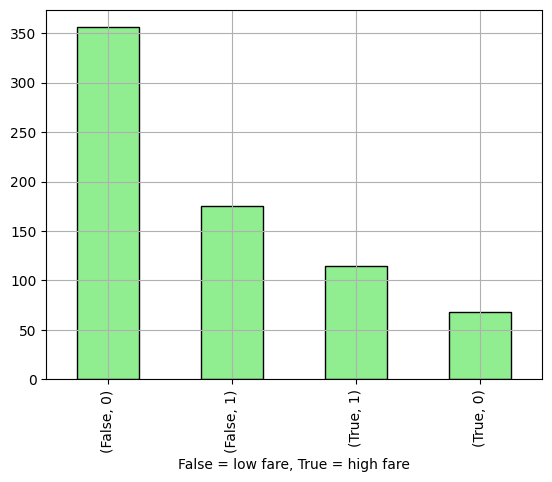

In [412]:
titanic_imp_col['h_fare'] = titanic_imp_col['Fare'] > 30
titanic_imp_col[['h_fare', 'Survived']].value_counts().plot(x='h_fare',kind='bar', color='lightgreen', edgecolor='black', grid=True)
plt.xlabel('False = low fare, True = high fare')
titanic_imp_col.isna().sum()

/tmp/ipython-input-3311291575.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_2.Fare.fillna(fare_mean, inplace= True)
/tmp/ipython-input-3311291575.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_2.Fare.fillna(fare_mean, inplace= True)


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
h_fare,0
Fam,0


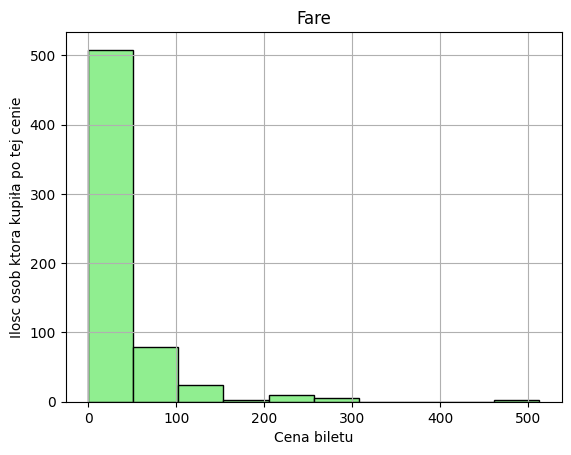

In [413]:
titanic_imp_col['Sex'] = titanic_imp_col['Sex'].map({'male': 0, 'female' : 1})
titanic_imp_col.isna().sum()
titanic_imp_col['Fam'] = titanic_imp_col['SibSp'] + titanic_imp_col['Parch']
titanic_imp_col.hist('Fare', label='Wpływ Fare na przezywalność', color='lightgreen', edgecolor='black', grid=True)
plt.xlabel('Cena biletu')
plt.ylabel('Ilosc osob ktora kupiła po tej cenie')
titanic_2 = titanic_imp_col.loc[(titanic_imp_col['Fare']) < 400]
fare_mean = titanic_2.Fare.mean()
titanic_2.Fare.fillna(fare_mean, inplace= True)
titanic_2.isna().sum()

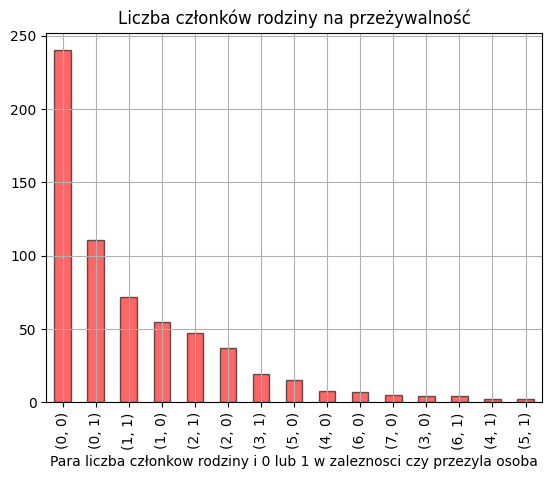

<Figure size 800x600 with 0 Axes>

In [414]:
titanic_2.loc[:, ['Fam', 'Survived']].value_counts().plot(kind='bar', color='red', grid=True, title='Liczba członków rodziny na przeżywalność', edgecolor='black',
                                                          xlabel = 'Para liczba członkow rodziny i 0 lub 1 w zaleznosci czy przezyla osoba', alpha = 0.6)
plt.figure(figsize=(8,6))
plt.tight_layout()
plt.show()


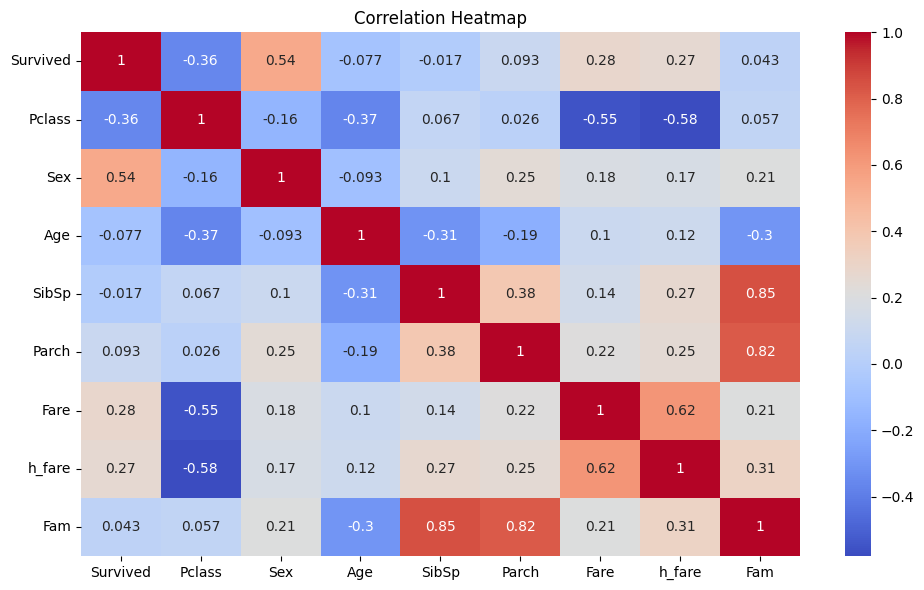

In [415]:
corr_matrix = titanic_imp_col.corr(numeric_only=True)


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [416]:
# końcowa tabela
titanic_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,h_fare,Fam
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,False,1
2,1,1,1,38.0,1,0,71.2833,True,1
3,1,3,1,26.0,0,0,7.9250,False,0
4,1,1,1,35.0,1,0,53.1000,True,1
5,0,3,0,35.0,0,0,8.0500,False,0
...,...,...,...,...,...,...,...,...,...
885,0,3,0,25.0,0,0,7.0500,False,0
887,0,2,0,27.0,0,0,13.0000,False,0
888,1,1,1,19.0,0,0,30.0000,False,0


# Tu koniec przekopiowanego kodu z 1 czesci zadania (+ heatmapa), wnioskow nie kopiowalem

Zaczne od podzielenia koncowej tabeli na dwie czesci. Train oraz check, najpierw bedziemy uczyc model a pozniej sprawdzimy czy dziala.

In [417]:
check_1 = titanic_2.iloc[0:501,0]
check_2 = titanic_2.iloc[500:629,0]
train_1 = titanic_2.iloc[0:501,1:]
train_2 = titanic_2.iloc[500:629,1:]
check_1

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
705,0
706,0
707,1


In [418]:
clf = SVC(kernel='linear')
clf.fit(train_1, check_1)
y_pred = clf.predict(train_1)
clf.score(train_1, check_1)

0.7724550898203593

Uzywajac modelu SVM uzyskalismy 77% skutecznosci, wiec nie jest to za duzo ale sprawdze inny model.

In [424]:
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(train_1, check_1)
y_pred = knn.predict(train_1)
knn.score(train_1, check_1)

0.7844311377245509

Metryka manhattan dała najwieksza skutecznosc, mamy 2% wiecej, uzylem metryki cosine, poniewaz mamy troche danych kategorialnych.

In [420]:
reg = LogisticRegression(C=10, penalty='l1', solver='liblinear')
reg.fit(train_1, check_1)
y_pred = reg.predict(train_1)
reg.score(train_1, check_1)

0.8143712574850299

Uzylem penalty l1, poniewaz podejrzewałem, ze niektore kolumny mogą nie wplywac az tak na przezywalnosc i musialem ustawic inny solver, bo domyslny nie obsluguje penalty = 'l1'. C ustalilem metoda prob i bledow.

In [423]:
dum = DummyClassifier(strategy='most_frequent')
dum.fit(train_1, check_1)
y_pred = dum.predict(train_1)
dum.score(train_1, check_1)

0.590818363273453

Mamy w naszych modelach duzo lepsze wyniki od DummyClassifie, wiec zostawiam te modele.

# EGZAMIN

Używam modelu reg, ponieważ miał najwieksza skuteczność.

In [427]:
from sklearn.metrics import accuracy_score, classification_report

y_reg = reg.predict(train_2)
accuracy = accuracy_score(check_2, y_reg)

print("Wyniki:")
print("-" * 30)
print(f"Ogólna dokładność: {accuracy:.4f}")

print(classification_report(check_2, y_reg, target_names=['Nie przeżył (0)', 'Przeżył (1)']))

Wyniki:
------------------------------
Ogólna dokładność: 0.8203
                 precision    recall  f1-score   support

Nie przeżył (0)       0.85      0.84      0.85        75
    Przeżył (1)       0.78      0.79      0.79        53

       accuracy                           0.82       128
      macro avg       0.81      0.82      0.82       128
   weighted avg       0.82      0.82      0.82       128

